In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
a=pd.read_csv('zomato.csv')
b=pd.read_csv('Country-code.csv')
print(a.shape)
print(b.shape)

(9551, 21)
(15, 3)


### Data is available in the form of two separate files. So, we combine them using merge function

In [3]:
data=pd.merge(a,b,how='inner')
data.shape

(9551, 23)

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Continent
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Asia
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Asia
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,Asia
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,Asia
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,Asia


In [5]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
Continent               0
dtype: int64

### There are 9 null values in the cuisines column which will be treated further

In [6]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'Continent'],
      dtype='object')

In [7]:
data['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

### As we can see that switch to order is not presenet in any of the restaurants, it does not give much information

In [8]:
data['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [9]:
data['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

### From the above 2 cells, we can see that Rating text and Rating color are representing the same thing in a different format. So, we can delete either of the columns.

In [10]:
data.drop(['Country Code','Restaurant ID', 'Restaurant Name','Address','Locality','Locality Verbose','Longitude', 'Latitude', 'Switch to order menu','Rating color'],axis=1,inplace=True)

In [12]:
data.columns=['City', 'Cuisines', 'Avg_cost', 'Currency',
       'Table_booking', 'Online_delivery', 'Delivering_now',
       'Price_range', 'Rating', 'Rating_text', 'Votes', 'Country',
       'Continent']

In [13]:
X=data.drop('Rating',axis=1)
y=data['Rating']

In [14]:
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Engineering 

### Lets create a new feature which counts the number of cuisines that a restaurant offers. The column Cuisines has few hunderds of different cuisines and some of the same cuisines are written with different spellings. Hence, it is very difficult to rectify those. However, while building a model, when encoding will be done, it will be heavy on computing and also may lead to Curse of Dimensionality as the number of features will become few hundreds.

In [15]:
X_train['no_of_cuisines'] = data.Cuisines.str.count(',')+1
X_train.head()

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,City,Cuisines,Avg_cost,Currency,Table_booking,Online_delivery,Delivering_now,Price_range,Rating_text,Votes,Country,Continent,no_of_cuisines
2629,New Delhi,"North Indian, South Indian",500,Indian Rupees(Rs.),No,No,No,2,Good,44,India,Asia,2.0
4685,New Delhi,"Chinese, North Indian",500,Indian Rupees(Rs.),No,No,No,2,Average,10,India,Asia,2.0
6159,New Delhi,Pizza,600,Indian Rupees(Rs.),No,No,No,2,Not rated,0,India,Asia,1.0
9197,Surat,"Chinese, Thai, Asian",800,Indian Rupees(Rs.),No,No,No,3,Good,226,India,Asia,3.0
5605,New Delhi,North Indian,200,Indian Rupees(Rs.),No,No,No,1,Not rated,0,India,Asia,1.0


In [16]:
X_train.isnull().sum()

City               0
Cuisines           5
Avg_cost           0
Currency           0
Table_booking      0
Online_delivery    0
Delivering_now     0
Price_range        0
Rating_text        0
Votes              0
Country            0
Continent          0
no_of_cuisines     5
dtype: int64

In [17]:
X_test['no_of_cuisines'] = data.Cuisines.str.count(',')+1
X_test.head()

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,City,Cuisines,Avg_cost,Currency,Table_booking,Online_delivery,Delivering_now,Price_range,Rating_text,Votes,Country,Continent,no_of_cuisines
4731,New Delhi,North Indian,350,Indian Rupees(Rs.),No,No,No,1,Poor,54,India,Asia,1.0
1468,Gurgaon,"Mughlai, Hyderabadi",700,Indian Rupees(Rs.),No,Yes,No,2,Very Good,84,India,Asia,2.0
9037,Noida,"North Indian, Mughlai",550,Indian Rupees(Rs.),No,No,No,2,Average,36,India,Asia,2.0
7866,New Delhi,Fast Food,200,Indian Rupees(Rs.),No,Yes,No,1,Very Good,163,India,Asia,1.0
5570,New Delhi,"North Indian, Mughlai",400,Indian Rupees(Rs.),No,No,No,1,Good,14,India,Asia,2.0


In [18]:
X_test.isnull().sum()

City               0
Cuisines           4
Avg_cost           0
Currency           0
Table_booking      0
Online_delivery    0
Delivering_now     0
Price_range        0
Rating_text        0
Votes              0
Country            0
Continent          0
no_of_cuisines     4
dtype: int64

### We are going to drop the feature Cuisines because there are thousands of different cuisines in the dataset. It would be very heavy on processing when we do encoding. Instead, we can count the number of cuisines that restaurant offers. Hence, new column no_of_cuisines has been created. As there are 9 null values in the cuisisnes, there are also 9 null values in the no_of_cuisines feature.

In [19]:
data[data.Cuisines.isnull()==True]

,City,Cuisines,Avg_cost,Currency,Table_booking,Online_delivery,Delivering_now,Price_range,Rating,Rating_text,Votes,Country,Continent
84,Albany,NaN,0,Dollar($),No,No,No,1,3.4,Average,34,United States,America
87,Albany,NaN,0,Dollar($),No,No,No,1,3.4,Average,36,United States,America
94,Albany,NaN,10,Dollar($),No,No,No,1,3.9,Good,160,United States,America
288,Gainesville,NaN,40,Dollar($),No,No,No,3,3.9,Good,209,United States,America
312,Macon,NaN,40,Dollar($),No,No,No,3,3.8,Good,102,United States,America
328,Miller,NaN,0,Dollar($),No,No,No,1,3.4,Average,11,United States,America
349,Orlando,NaN,40,Dollar($),No,No,No,3,4.4,Very Good,1158,United States,America
395,Rest of Hawaii,NaN,10,Dollar($),No,No,No,1,4.7,Excellent,707,United States,America
432,Savannah,NaN,10,Dollar($),No,No,No,1,3.9,Good,309,United States,America


### From the above cell e can see that all the null values are from restuarants that are in Unitesd States.

In [20]:
X_train[X_train.Cuisines.isnull()==True]
data2=X_train[X_train.Country=='United States']
data2.no_of_cuisines.value_counts()

3.0    106
2.0     98
1.0     90
4.0      1
Name: no_of_cuisines, dtype: int64

In [21]:
X_test[X_test.Cuisines.isnull()==True]
data3=X_test[X_test.Country=='United States']
data3.no_of_cuisines.value_counts()

3.0    57
1.0    43
2.0    29
4.0     1
Name: no_of_cuisines, dtype: int64

### Since 3 number of cuisines is mode for United States in both train and test, lets impute the null values with 3 in both X_train and X-test dataframes 

In [22]:
X_train["no_of_cuisines"].fillna(3, inplace = True)
X_test["no_of_cuisines"].fillna(3, inplace = True)

C:\Users\Hemanth\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
data.isnull().sum()

City               0
Cuisines           9
Avg_cost           0
Currency           0
Table_booking      0
Online_delivery    0
Delivering_now     0
Price_range        0
Rating             0
Rating_text        0
Votes              0
Country            0
Continent          0
dtype: int64

### Lets create a new feature named Continent which inlcudes respective countries that belong to a continent. This feature gives the model some extra information.

In [24]:
def continent (x):
    if (x in ['United States','Canada','Brazil']):
        return ('Americas')
    elif (x in ['India','Phillipines','Sri Lanka','UAE' ,'Indonesia' ,'Qatar','Singapore']):
        return ('Asia')
    elif (x in ['Australia','New Zealand']):
        return ('Australia_continent')
    elif (x in ['Turkey','United Kingdom']):
        return ('Europe')
    else:
        return ('Africa')

In [25]:
X_train['Continent']=X_train['Country'].apply(continent)
X_test['Continent']=X_test['Country'].apply(continent)

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


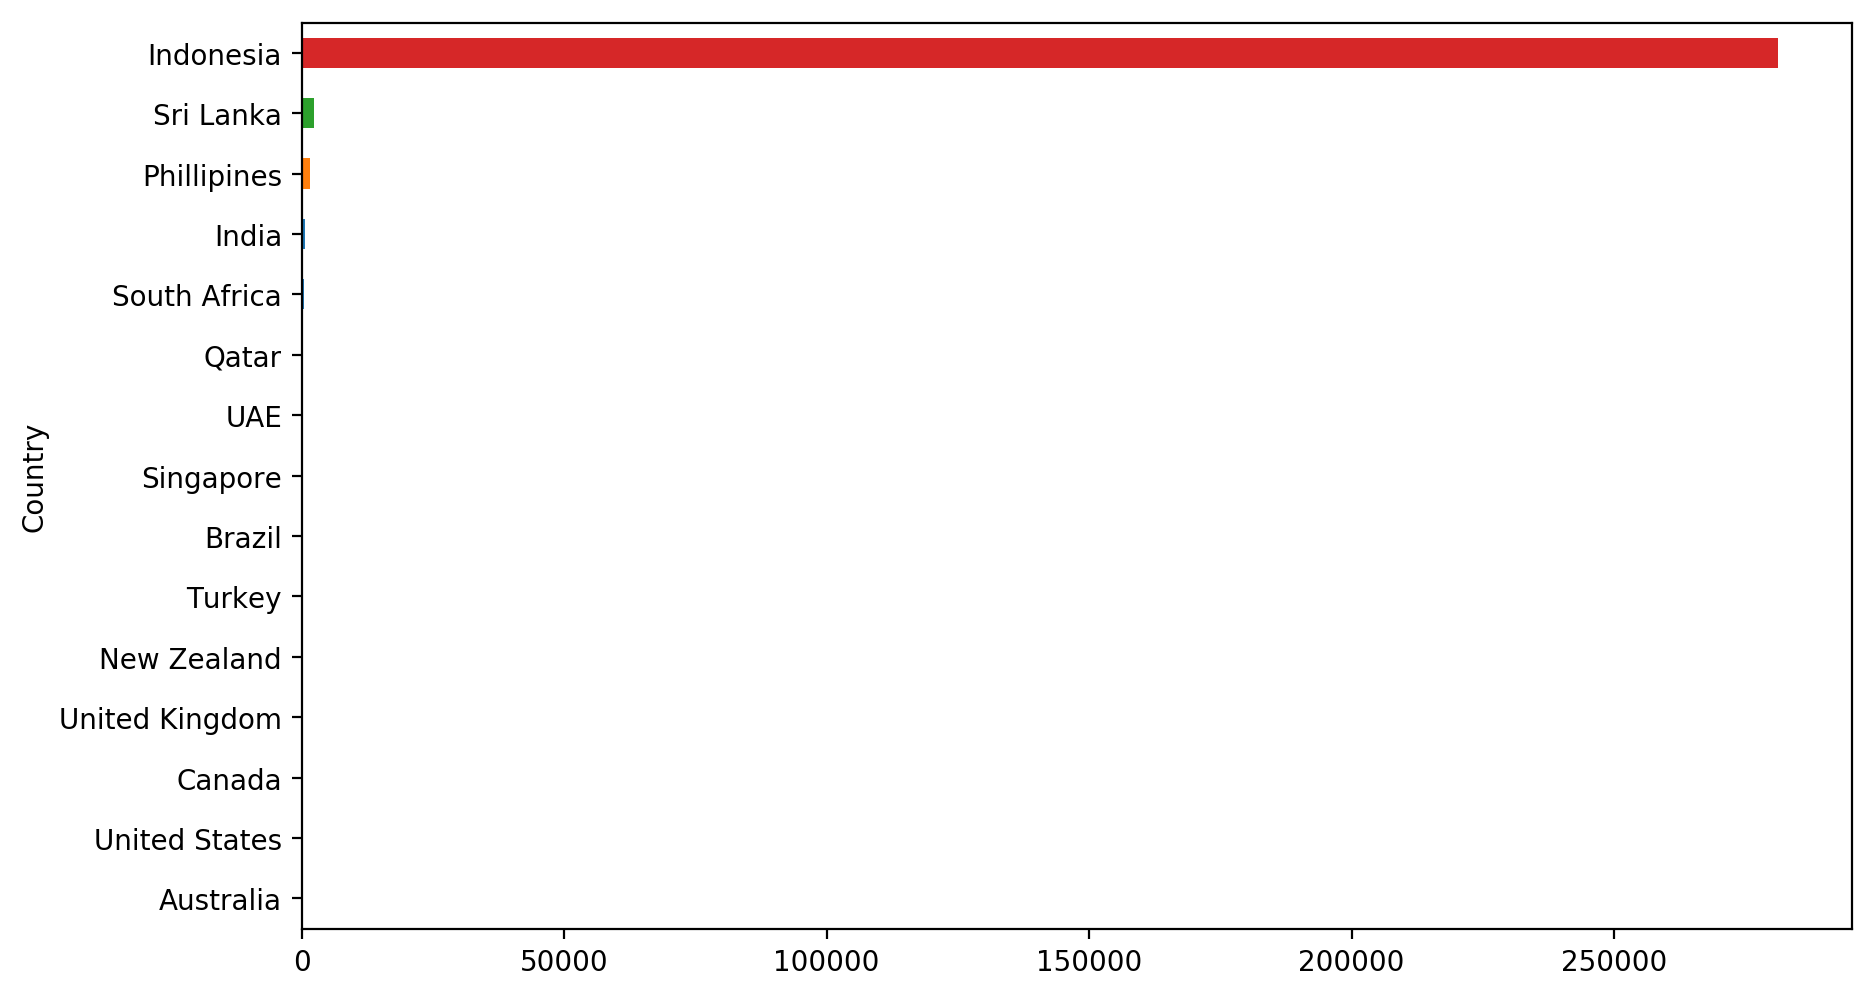

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(8,5),dpi=100)
data.groupby(['Country']).mean()['Avg_cost'].sort_values().plot(kind='barh',figsize=(10,6))

### From the above plot, we can see that the cost in Indonesia is very high which is due to the amount they pay for food. In the given data, each country's average cost is mentioned in their respective currency. Lets standardize the currency unit to Dollar. Below conversion rates are according to Google on the day of writing this code

In [27]:
d = {'Botswana Pula(P)':0.095, 'Brazilian Real(R$)':0.266,'Dollar($)':1,'Emirati Diram(AED)':0.272,
    'Indian Rupees(Rs.)':0.014,'Indonesian Rupiah(IDR)':0.00007,'NewZealand($)':0.688,'Pounds(Œ£)':1.314,
    'Qatari Rial(QR)':0.274,'Rand(R)':0.072,'Sri Lankan Rupee(LKR)':0.0055,'Turkish Lira(TL)':0.188}

In [28]:
X_train['New_cost'] = X_train['Avg_cost'] * X_train['Currency'].map(d)
X_test['New_cost'] = X_test['Avg_cost'] * X_test['Currency'].map(d)

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
plt.figure(figsize=(8,5),dpi=100)
X_train.groupby(['Country']).mean()['New_cost'].sort_values().plot(kind='barh',figsize=(10,6))

KeyError: 'Country'

<Figure size 800x500 with 0 Axes>

### Now, after bringing all country's cost into Dollar, we can observe that Singapore has the expensive food while India has the least expensive food. 

In [30]:
X_train.Country.value_counts()

India             6070
United States      300
United Kingdom      57
UAE                 42
South Africa        38
Brazil              33
New Zealand         31
Turkey              28
Australia           15
Qatar               15
Indonesia           15
Singapore           14
Phillipines         14
Sri Lanka           11
Canada               2
Name: Country, dtype: int64

In [31]:
X_train.Continent.value_counts()

Asia                   6181
Americas                335
Europe                   85
Australia_continent      46
Africa                   38
Name: Continent, dtype: int64

In [32]:
X_train.head()

,City,Cuisines,Avg_cost,Currency,Table_booking,Online_delivery,Delivering_now,Price_range,Rating_text,Votes,Country,Continent,no_of_cuisines,New_cost
2629,New Delhi,"North Indian, South Indian",500,Indian Rupees(Rs.),No,No,No,2,Good,44,India,Asia,2.0,7.0
4685,New Delhi,"Chinese, North Indian",500,Indian Rupees(Rs.),No,No,No,2,Average,10,India,Asia,2.0,7.0
6159,New Delhi,Pizza,600,Indian Rupees(Rs.),No,No,No,2,Not rated,0,India,Asia,1.0,8.4
9197,Surat,"Chinese, Thai, Asian",800,Indian Rupees(Rs.),No,No,No,3,Good,226,India,Asia,3.0,11.2
5605,New Delhi,North Indian,200,Indian Rupees(Rs.),No,No,No,1,Not rated,0,India,Asia,1.0,2.8


### From the above two cells, we can observe that both the features rating_color and rating_text indicates the same thing. So, both features together does not give any extra information. Hence, rating color can be dropped.

In [33]:
X_train.columns

Index(['City', 'Cuisines', 'Avg_cost', 'Currency', 'Table_booking',
       'Online_delivery', 'Delivering_now', 'Price_range', 'Rating_text',
       'Votes', 'Country', 'Continent', 'no_of_cuisines', 'New_cost'],
      dtype='object')

In [34]:
dictionary = {'Excellent': 5,'Very Good': 4,'Average': 2,'Good': 3,'Not rated': 2,'Poor': 1} 
X_train.Rating_text = [dictionary[item] for item in X_train.Rating_text] 
X_test.Rating_text = [dictionary[item] for item in X_test.Rating_text] 

C:\Users\Hemanth\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [35]:
Binary= {'Yes': 1,'No': 0} 

X_train.Online_delivery = [Binary[item] for item in X_train.Online_delivery] 
X_train.Table_booking = [Binary[item] for item in X_train.Table_booking] 
X_train.Delivering_now = [Binary[item] for item in X_train.Delivering_now] 

X_test.Online_delivery = [Binary[item] for item in X_test.Online_delivery] 
X_test.Table_booking = [Binary[item] for item in X_test.Table_booking] 
X_test.Delivering_now = [Binary[item] for item in X_test.Delivering_now] 

In [36]:
X_train.drop(['Avg_cost','Cuisines','Currency','City'],axis=1,inplace=True)
X_test.drop(['Avg_cost','Cuisines','Currency','City'],axis=1,inplace=True)

C:\Users\Hemanth\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
print(X_train.shape)
print(X_test.shape)

(6685, 10)
(2866, 10)


In [38]:
X_train.isnull().sum()

Table_booking      0
Online_delivery    0
Delivering_now     0
Price_range        0
Rating_text        0
Votes              0
Country            0
Continent          0
no_of_cuisines     0
New_cost           0
dtype: int64

In [39]:
X_train['Delivering_now'].value_counts()

0    6658
1      27
Name: Delivering_now, dtype: int64

In [40]:
novotes=data.groupby('Country')

In [41]:
data.groupby(['Country']).mean()

,Avg_cost,Price_range,Rating,Votes
Country,,,,
Australia,24.083333,2.125000,3.658333,111.416667
Brazil,134.666667,3.400000,3.763333,19.616667
Canada,36.250000,2.500000,3.575000,103.000000
India,623.370319,1.721683,2.523324,137.212552
Indonesia,281190.476190,2.952381,4.295238,772.095238
New Zealand,69.750000,3.150000,4.262500,243.025000
Phillipines,1606.818182,3.363636,4.468182,407.409091
Qatar,223.750000,3.650000,4.060000,163.800000
Singapore,155.750000,3.650000,3.575000,31.900000


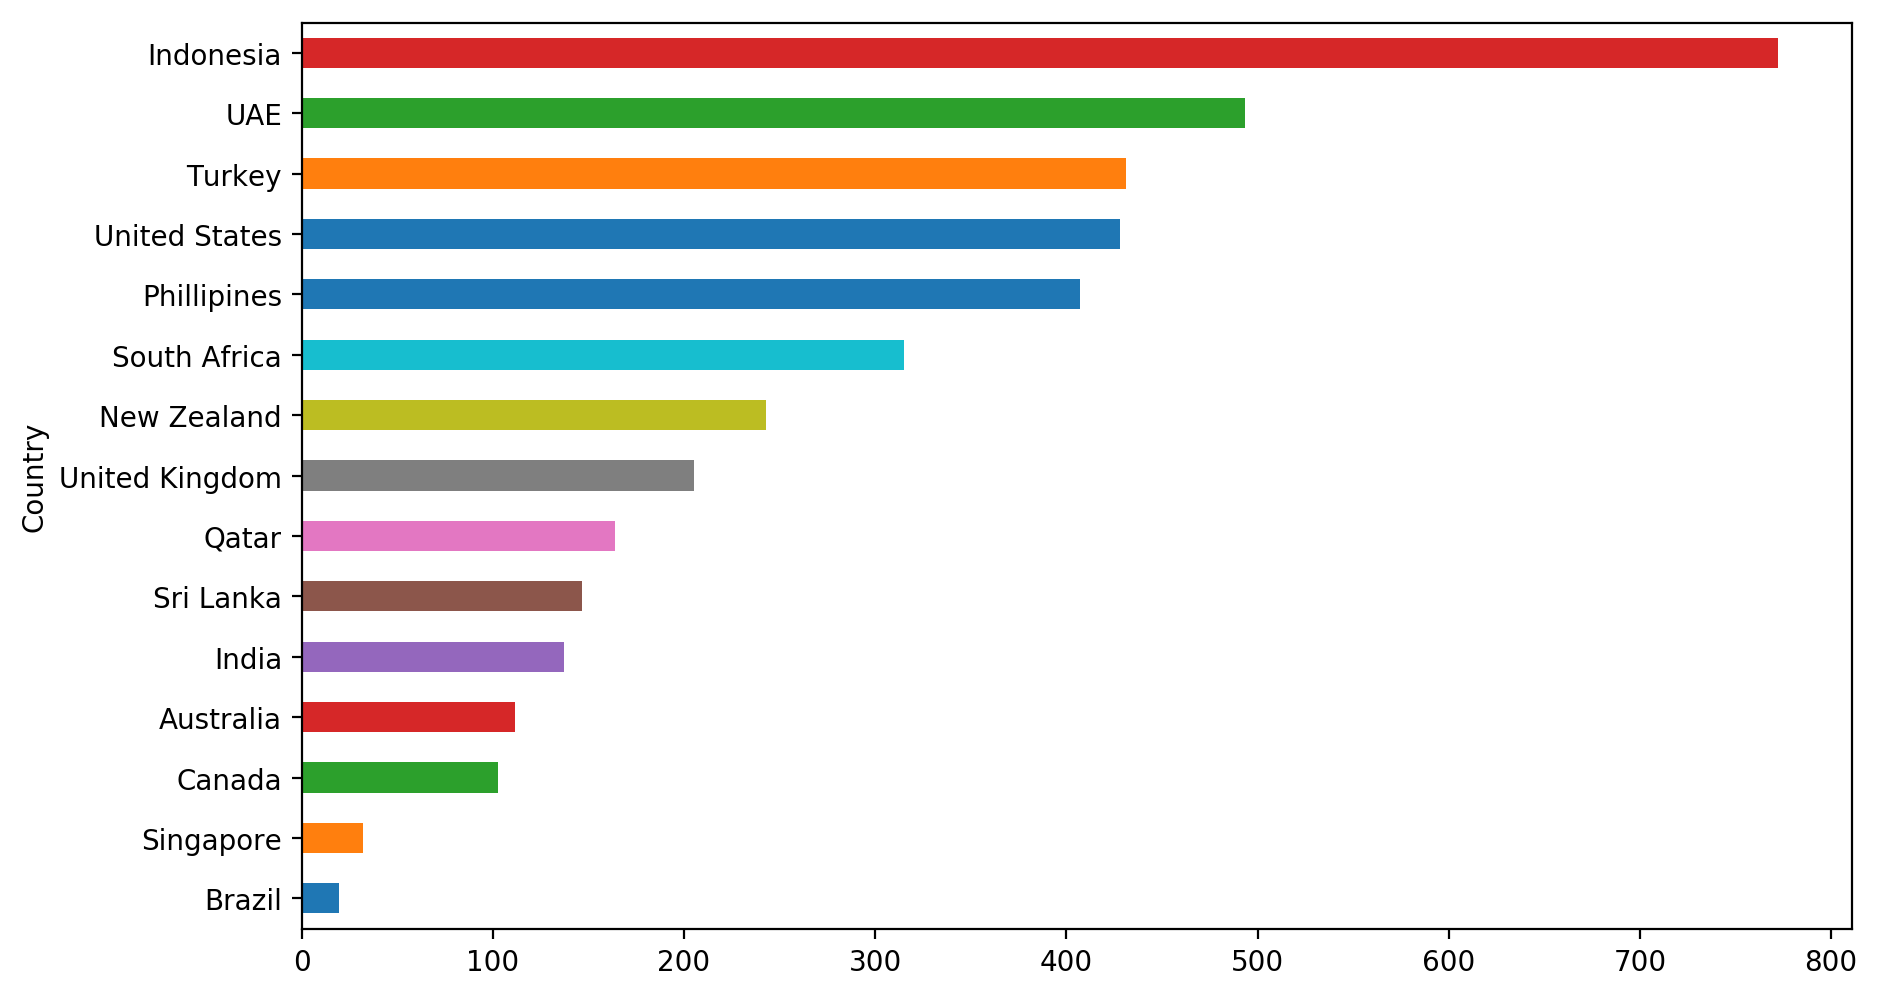

In [42]:
%config InlineBackend.figure_format = 'retina'
df=data.groupby(['Country']).mean()
plt.figure(figsize=(8,5),frameon=True,dpi=100)
df['Votes'].sort_values().plot(kind='barh',figsize=(10,6))

### Brazil has the least number of votes while Indonesia has the maximum

In [43]:
df.head()

,Avg_cost,Price_range,Rating,Votes
Country,,,,
Australia,24.083333,2.125000,3.658333,111.416667
Brazil,134.666667,3.400000,3.763333,19.616667
Canada,36.250000,2.500000,3.575000,103.000000
India,623.370319,1.721683,2.523324,137.212552
Indonesia,281190.476190,2.952381,4.295238,772.095238


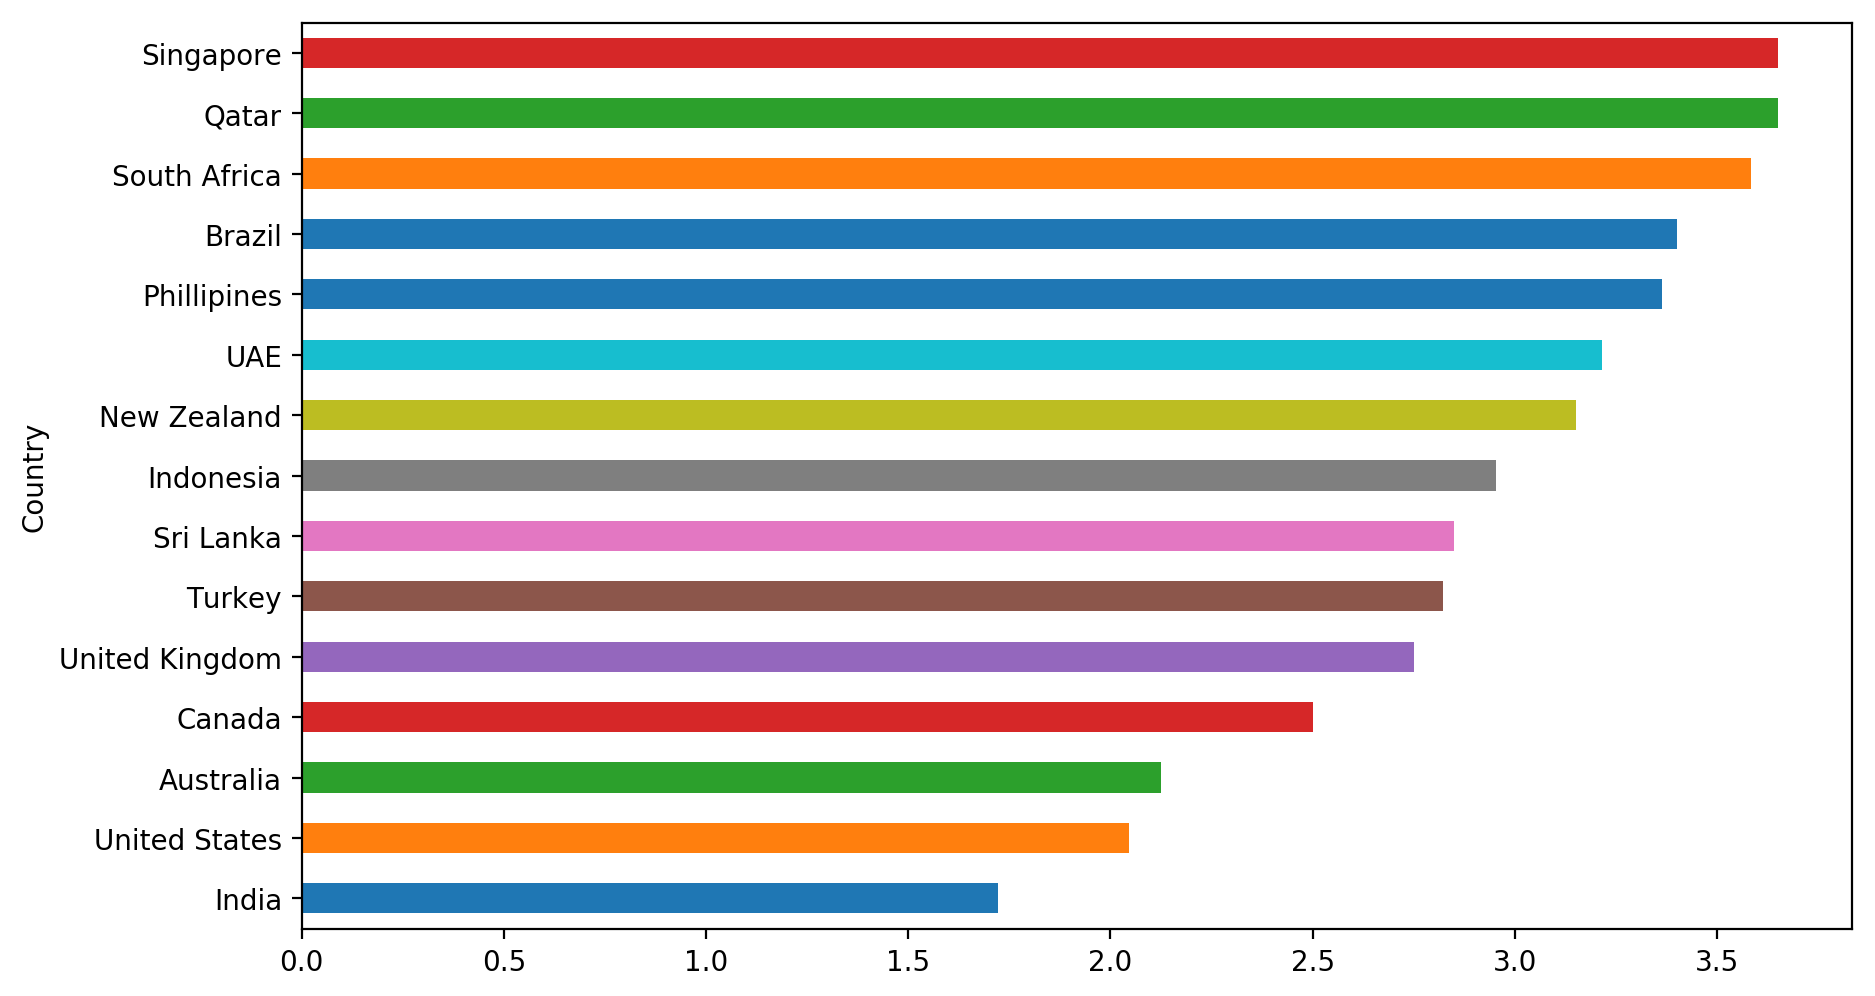

In [44]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(6,4),dpi=100)
data.groupby(['Country']).mean()['Price_range'].sort_values().plot(kind='barh',figsize=(10,6))

Dataset has categerica variables in the form of strings. For building a model, whole data need to be in numerical. Hence, encoding need to be done

In [45]:
train_conti=pd.DataFrame(pd.get_dummies(X_train.Continent))
test_conti=pd.get_dummies(X_test.Continent)

In [46]:
train_countr=pd.get_dummies(X_train.Country)
test_countr=pd.get_dummies(X_test.Country)

In [47]:
X_train=pd.concat([X_train,train_conti,train_countr],axis=1)
X_test=pd.concat([X_test,test_conti,test_countr],axis=1)

In [48]:
X_train.drop(['Country','Continent'],axis=1,inplace=True)
X_test.drop(['Country','Continent'],axis=1,inplace=True)

From the above dataframe, we can observe that there are no strings but all the  values are in the form of numbers.

In [49]:
X_train.columns=['Table_booking', 'Online_delivery', 'Delivering_now', 'Price_range',
       'Rating_text', 'Votes', 'no_of_cuisines', 'New_cost', 'Africa',
       'Americas', 'Asia', 'Australia_continent', 'Europe', 'Australia',
       'Brazil', 'Canada', 'India', 'Indonesia', 'NewZealand', 'Phillipines',
       'Qatar', 'Singapore', 'SouthAfrica', 'SriLanka', 'Turkey', 'UAE',
       'UnitedKingdom', 'UnitedStates']
X_test.columns=['Table_booking', 'Online_delivery', 'Delivering_now', 'Price_range',
       'Rating_text', 'Votes', 'no_of_cuisines', 'New_cost', 'Africa',
       'Americas', 'Asia', 'Australia_continent', 'Europe', 'Australia',
       'Brazil', 'Canada', 'India', 'Indonesia', 'NewZealand', 'Phillipines',
       'Qatar', 'Singapore', 'SouthAfrica', 'SriLanka', 'Turkey', 'UAE',
       'UnitedKingdom', 'UnitedStates']

In [50]:
X_train.corr()

,Table_booking,Online_delivery,Delivering_now,Price_range,Rating_text,Votes,no_of_cuisines,New_cost,Africa,Americas,...,NewZealand,Phillipines,Qatar,Singapore,SouthAfrica,SriLanka,Turkey,UAE,UnitedKingdom,UnitedStates
Table_booking,1.000000,0.092934,-0.016397,0.503339,0.157058,0.156444,0.216266,0.277135,-0.021954,-0.085225,...,-0.025326,0.083331,-0.017596,-0.016998,-0.021954,-0.015064,-0.024064,0.057567,0.005497,-0.080429
Online_delivery,0.092934,1.000000,0.108110,0.073504,0.029602,0.067005,0.158543,-0.051990,-0.044537,-0.135294,...,-0.040205,-0.026984,-0.027934,-0.026984,-0.044537,-0.023914,-0.038202,0.031089,-0.054625,-0.127681
Delivering_now,-0.016397,0.108110,1.000000,0.008619,-0.008331,-0.002451,0.041202,-0.006558,-0.004815,-0.014627,...,-0.004347,-0.002917,-0.003020,-0.002917,-0.004815,-0.002585,-0.004130,-0.005064,-0.005905,-0.013804
Price_range,0.503339,0.073504,0.008619,1.000000,0.472088,0.310152,0.308747,0.587727,0.157322,0.106806,...,0.102531,0.078742,0.101249,0.096843,0.157322,0.049656,0.065347,0.130388,0.086753,0.065490
Rating_text,0.157058,0.029602,-0.008331,0.472088,1.000000,0.459501,0.189473,0.390076,0.139045,0.307766,...,0.134401,0.100948,0.065294,0.006921,0.139045,0.054425,0.123499,0.161614,0.153008,0.289800
Votes,0.156444,0.067005,-0.002451,0.310152,0.459501,1.000000,0.167486,0.187541,0.032985,0.120728,...,0.014796,0.026232,0.001764,-0.013110,0.032985,0.000543,0.037215,0.061962,0.012562,0.134819
no_of_cuisines,0.216266,0.158543,0.041202,0.308747,0.189473,0.167486,1.000000,0.110861,0.037089,-0.002860,...,-0.017972,0.021066,-0.011376,0.032938,0.037089,0.014364,-0.020600,0.015957,-0.020180,0.002397
New_cost,0.277135,-0.051990,-0.006558,0.587727,0.390076,0.187541,0.110861,1.000000,0.089227,0.205763,...,0.118627,0.337595,0.127343,0.414464,0.089227,0.006552,0.013661,0.161231,0.246644,0.178206
Africa,-0.021954,-0.044537,-0.004815,0.157322,0.139045,0.032985,0.037089,0.089227,1.000000,-0.017367,...,-0.005161,-0.003464,-0.003586,-0.003464,1.000000,-0.003070,-0.004904,-0.006012,-0.007012,-0.016389
Americas,-0.085225,-0.135294,-0.014627,0.106806,0.307766,0.120728,-0.002860,0.205763,-0.017367,1.000000,...,-0.015677,-0.010522,-0.010892,-0.010522,-0.017367,-0.009325,-0.014896,-0.018263,-0.021300,0.943723


### Scaling. Lets apply zscore for the purpose of data scaling

In [51]:
from sklearn import model_selection
from scipy.stats import zscore
from sklearn.metrics import explained_variance_score

In [52]:
train_scale=pd.DataFrame(zscore(X_train,axis=1))
test_scale=pd.DataFrame(zscore(X_test,axis=1))

In [53]:
train_scale.columns=['Table_booking', 'Online_delivery', 'Delivering_now', 'Price_range',
       'Rating_text', 'Votes', 'no_of_cuisines', 'New_cost', 'Africa',
       'Americas', 'Asia', 'Australia_continent', 'Europe', 'Australia',
       'Brazil', 'Canada', 'India', 'Indonesia', 'NewZealand', 'Phillipines',
       'Qatar', 'Singapore', 'SouthAfrica', 'SriLanka', 'Turkey', 'UAE',
       'UnitedKingdom', 'UnitedStates']
test_scale.columns=['Table_booking', 'Online_delivery', 'Delivering_now', 'Price_range',
       'Rating_text', 'Votes', 'no_of_cuisines', 'New_cost', 'Africa',
       'Americas', 'Asia', 'Australia_continent', 'Europe', 'Australia',
       'Brazil', 'Canada', 'India', 'Indonesia', 'NewZealand', 'Phillipines',
       'Qatar', 'Singapore', 'SouthAfrica', 'SriLanka', 'Turkey', 'UAE',
       'UnitedKingdom', 'UnitedStates']

In [54]:
train_scale.head()

,Table_booking,Online_delivery,Delivering_now,Price_range,Rating_text,Votes,no_of_cuisines,New_cost,Africa,Americas,...,NewZealand,Phillipines,Qatar,Singapore,SouthAfrica,SriLanka,Turkey,UAE,UnitedKingdom,UnitedStates
0,-0.261832,-0.261832,-0.261832,-0.017455,0.104733,5.114443,-0.017455,0.593485,-0.261832,-0.261832,...,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832,-0.261832
1,-0.398334,-0.398334,-0.398334,0.493934,0.493934,4.063003,0.493934,2.724602,-0.398334,-0.398334,...,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334,-0.398334
2,-0.340418,-0.340418,-0.340418,0.897466,0.897466,-0.340418,0.278524,4.858696,-0.340418,-0.340418,...,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418,-0.340418
3,-0.211831,-0.211831,-0.211831,-0.140140,-0.140140,5.188931,-0.140140,0.055817,-0.211831,-0.211831,...,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831,-0.211831
4,-0.459933,-0.459933,-0.459933,1.003490,2.466914,-0.459933,1.003490,3.637653,-0.459933,-0.459933,...,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933,-0.459933


In [55]:
train_scale=np.round(train_scale,decimals=4)
test_scale=np.round(test_scale,decimals=4)
y_train=np.round(y_train,decimals=4)

### LINEAR REGRESSION

In [56]:
# implementation of Linear Regression model using scikit-learn and K-fold for stable model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

0.8472025815048616
RMSE score through Linear regression :  0.5887583774996873


In [ ]:
lr = LinearRegression()
lr.fit(train_scale,y_train)
lr_pred = lr.predict(test_scale)
print(r2_score(y_test,np.round(lr_pred,decimals=1)))
print('RMSE score through Linear regression : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(lr_pred,decimals=1))))

### Decision Tree regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(train_scale,y_train)
dt_pred=dt.predict(test_scale)
print('RMSE score through Decision tree regression : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(dt_pred,decimals=1))))

RMSE score through Decision tree regression :  0.3480130019789579


### RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(train_scale,y_train)
rf_pred=rf.predict(test_scale)
print('RMSE score through Random Forest : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(rf_pred,decimals=1))))


C:\Users\Hemanth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE score through Random Forest :  0.2722448099902795


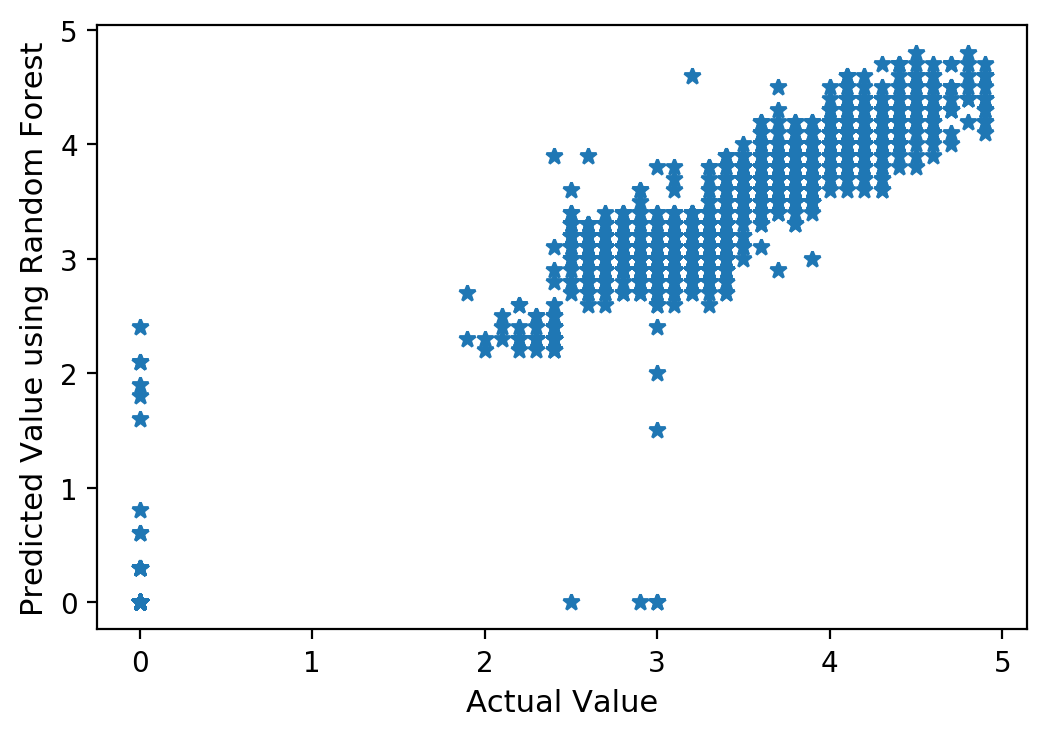

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test,np.round(rf_pred,decimals=1),'*')
plt.xlabel('Actual Value',size=11)
plt.ylabel('Predicted Value using Random Forest',size=11)
plt.show()

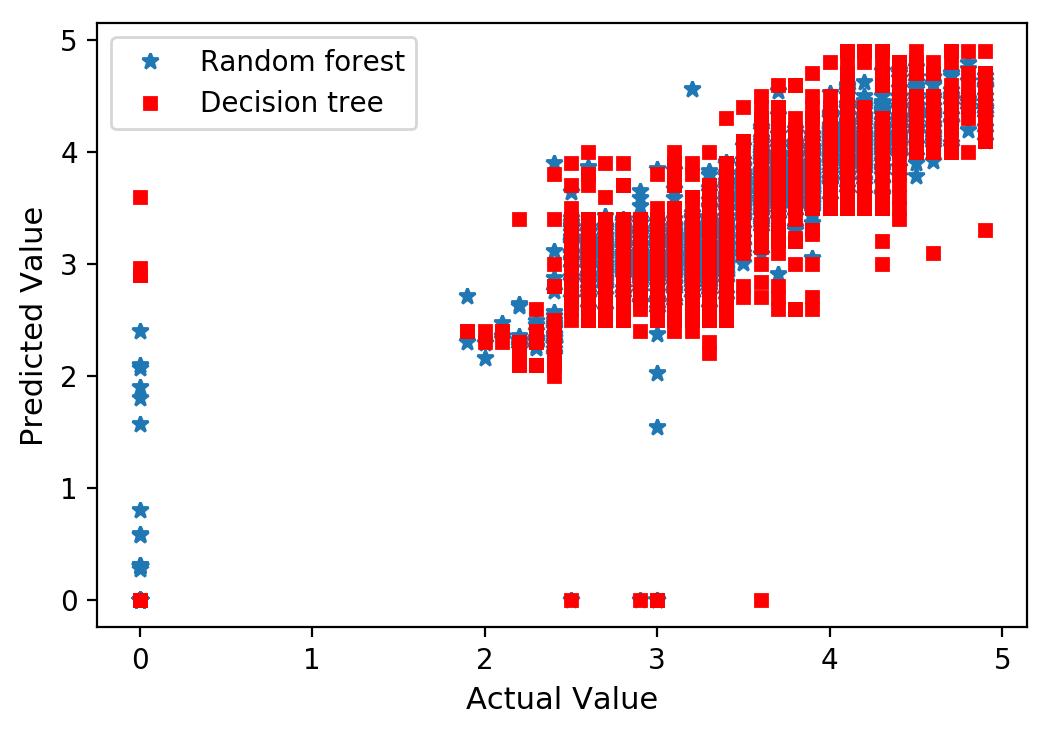

In [60]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test,rf_pred,'*',label='Random forest')
plt.plot(y_test,dt_pred,'o',color='red',label='Decision tree',marker='s',markersize=4)
plt.legend()
plt.xlabel('Actual Value',size=11)
plt.ylabel('Predicted Value',size=11)
plt.show()

### XG BOOST REGRESSOR

In [81]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=4)
xgb.fit(train_scale,y_train)
xgb_pred= xgb.predict(test_scale)
print('RMSE score through XGBoost : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(xgb_pred,decimals=1))))
print('R square value using XGBoost',r2_score(y_test,xgb_pred))
print('Variance covered by XG Boost Regression : ',explained_variance_score(xgb_pred,y_test))

C:\Users\Hemanth\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE score through XGBoost :  0.26668338639808453
R square value using XGBoost 0.9688974390273124
Variance covered by XG Boost Regression :  0.9678379795043588


### Learning rate and max depth re taken in such a way that it gives the least rmse score. Mutliple scores are obtained by trial and error method.

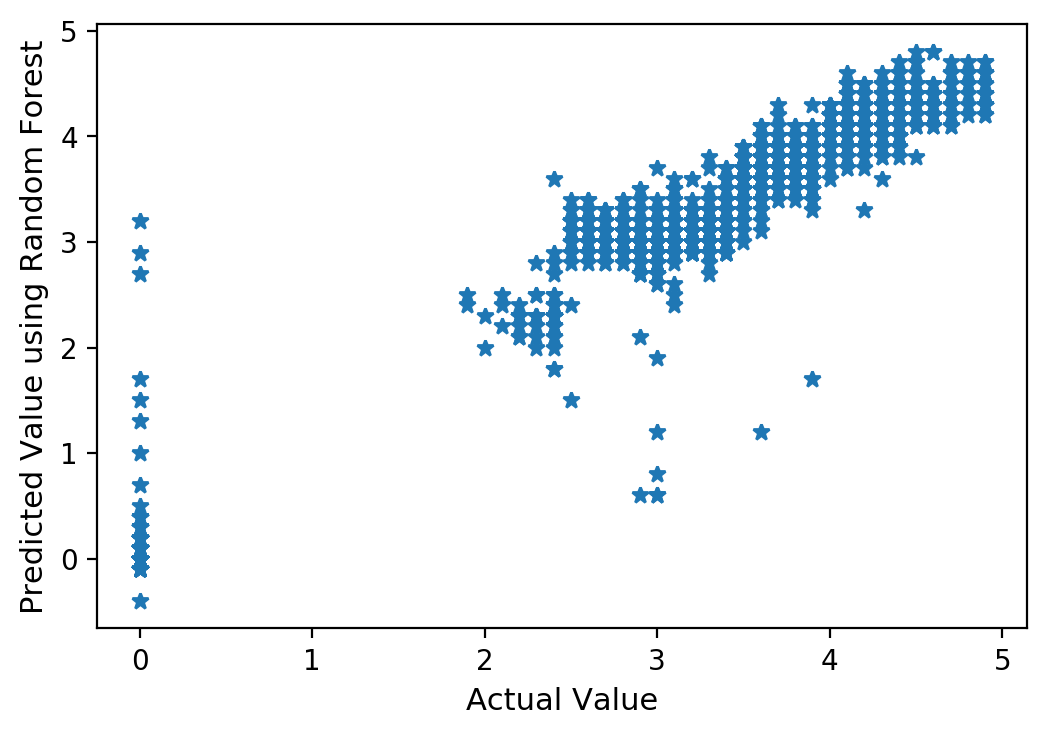

In [82]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test,np.round(xgb_pred,decimals=1),'*')
plt.xlabel('Actual Value',size=11)
plt.ylabel('Predicted Value using Random Forest',size=11)
plt.show()

### Comparison among different models predicting the continous variable

In [83]:
print('RMSE score through Linear Regression : ',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
print('R square value using Linear Regression',r2_score(y_test,np.round(lr_pred,decimals=1)))
print('Variance covered by Linear Regression : ',explained_variance_score(lr_pred,y_test))
print('\n')
print('RMSE score through Decision tree Regression : ',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))
print('R square value using Decision Tree Regression',r2_score(y_test,np.round(dt_pred,decimals=1)))
print('Variance covered by Decision Tree Regression : ',explained_variance_score(dt_pred,y_test))
print('\n')
print('RMSE score through Random Forest : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(rf_pred,decimals=1))))
print('R square value using Random Forest',r2_score(y_test,rf_pred))
print('Variance covered by Random Forest : ',explained_variance_score(rf_pred,y_test))
print('\n')
print('RMSE score through XGBoost : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(xgb_pred,decimals=1))))
print('R square value using XGBoost',r2_score(y_test,xgb_pred))
print('Variance covered by XG Boost Regression : ',explained_variance_score(xgb_pred,y_test))

RMSE score through Linear Regression :  0.587465175801052
R square value using Linear Regression 0.8472025815048616
Variance covered by Linear Regression :  0.824414467216428


RMSE score through Decision tree Regression :  0.3481249444448844
R square value using Decision Tree Regression 0.9466133393052085
Variance covered by Decision Tree Regression :  0.9462837213330394


RMSE score through Random Forest :  0.2722448099902795
R square value using Random Forest 0.9675662065684767
Variance covered by Random Forest :  0.9667326770569147


RMSE score through XGBoost :  0.26668338639808453
R square value using XGBoost 0.9688974390273124
Variance covered by XG Boost Regression :  0.9678379795043588


### Conclusons

>- XG Boost regressor has the least rmse score which indirectly tells us that it is the most accurte model among the 4 models
>- R square value and Variance explained are almost equal
>- Variance explained by XG Boost regressor and Random forest are amost equal
>- Generally, Random Forest is expected to have lower RMSE than a Decsion Tree which is evident in our case study
>- Due to the assumptions of Linear Regression algorithm which is a bit offset from the real case scenaro, Linear Regression has under performed